<a href="https://colab.research.google.com/github/SUDHARSSHINI/Stock-Market-Analysis/blob/main/Stock_market%20LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STOCK MARKET DATA ANALYSIS

Loading the data

In [ ]:
import pandas as pd

# Assuming your files are named nifty_data_1.xlsx, nifty_data_2.xlsx, ..., nifty_data_5.xlsx
file_names = ['/content/CBOE 10Y Bond 2008_2023.csv', '/content/Crude 2008_2023.csv', '/content/Gold 2008_2023.csv', '/content/NIFTY 2008_2023.csv', '/content/USDINR 2008_2023.csv']

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each file and read the data into the combined DataFrame
for file_name in file_names:
    df = pd.read_csv(file_name)  # Use pd.read_csv for CSV files
    combined_df = combined_df.append(df, ignore_index=True)

# Now you can proceed with your analysis using the combined DataFrame (combined_df)
# For example, you can drop a column named 'target' if it exists
if 'target' in combined_df.columns:
    X = combined_df.drop('target', axis=1)
    y = combined_df['target']
else:
    X = combined_df  # Adjust this line according to your actual columns

# Further analysis and processing can be done on X and y


<ipython-input-4-4b6925c0212a>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-4-4b6925c0212a>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-4-4b6925c0212a>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-4-4b6925c0212a>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-4-4b6925c0212a>:12: FutureWarning: The frame.append method is deprecated and will

LOAD

The provided code combines data from multiple CSV files into a single pandas DataFrame `combined_df`. It iterates through each file, reads its contents using `pd.read_csv()`, and appends them to `combined_df`. If a column named 'target' exists, it separates features (X) and target variable (y). Otherwise, the entire DataFrame is considered as features. This approach simplifies analysis by consolidating data from different sources into one DataFrame.

>


---


---



---



In [ ]:
import pandas as pd

# Assuming 'Close' as the target variable
target_column = 'Close'

# Assuming 'Date' is a column containing datetime information
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Feature Engineering
# Example: Extracting year, month, and day as new features
combined_df['Year'] = combined_df['Date'].dt.year
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Day'] = combined_df['Date'].dt.day

# Check if 'Close' column is of string type, if not convert it to string
if combined_df['Close'].dtype != 'O':
    combined_df['Close'] = combined_df['Close'].astype(str)

# Remove commas from 'Close' column and convert to numeric format
combined_df['Close'] = pd.to_numeric(combined_df['Close'].str.replace(',', ''), errors='coerce')



The code snippet performs data preprocessing on a DataFrame named `combined_df`:
1. Converts the 'Date' column to datetime format.
2. Engineers new features ('Year', 'Month', 'Day') from the 'Date' column.
3. Converts the 'Close' column to string type if not already.
4. Removes commas and converts 'Close' column to numeric format, handling non-convertible values as NaN.
5. These steps aim to prepare the data for analysis and machine learning tasks by ensuring consistency and handling missing values.

              Close     Adj Close          Year         Month           Day
count  12092.000000  12092.000000  21045.000000  21045.000000  21045.000000
mean    3055.003514   3055.003514   2015.497315      6.522642     15.750915
std     5084.092590   5084.092590      4.609608      3.434734      8.755915
min        0.499000      0.499000   2008.000000      1.000000      1.000000
25%        3.133750      3.133750   2011.000000      4.000000      8.000000
50%       64.159000     64.159000   2015.000000      7.000000     16.000000
75%     5413.925049   5413.925049   2020.000000      9.000000     23.000000
max    21778.699219  21778.699219   2023.000000     12.000000     31.000000


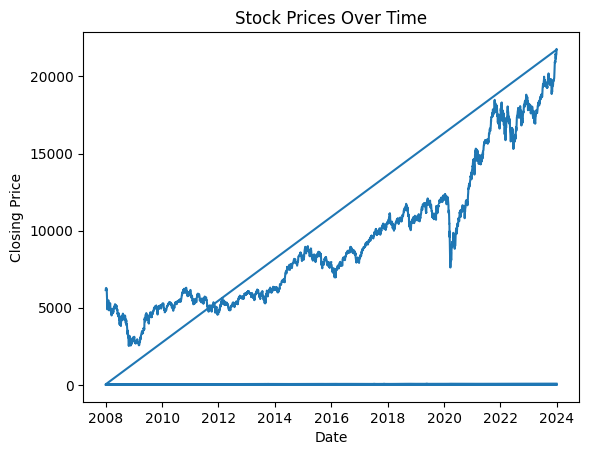

In [ ]:
# Basic statistics
print(combined_df.describe())

# Plotting
import matplotlib.pyplot as plt

plt.plot(combined_df['Date'], combined_df['Close'])
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


CALCULATION

The code calculates descriptive statistics for the DataFrame `combined_df`, displaying information such as count, mean, standard deviation, minimum, quartiles, and maximum values for numeric columns.
It then uses matplotlib to create a line plot showing the trend of 'Close' prices over time.
The x-axis represents dates from the 'Date' column, while the y-axis displays corresponding 'Close' prices.
The title of the plot is set as 'Stock Prices Over Time', with 'Date' and 'Closing Price' specified as the x and y-axis labels, respectively.
This visualization helps visualize the overall trend and fluctuations in stock prices over the period covered by the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Exclude non-numerical columns and target variables
exclude_columns = ['Close', 'Adj Close', 'Date']  # Add any other columns you want to exclude
numerical_features = [col for col in X.columns if col not in exclude_columns and X[col].dtype in ['float64', 'int64']]

# Check if there are numerical features to scale
if not numerical_features:
    raise ValueError("No numerical features found for scaling.")

# Standardize the selected numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


The code snippet utilizes `StandardScaler` from scikit-learn to standardize numerical features in the DataFrame `X`.
It identifies numerical features by excluding specified non-numerical columns like 'Close', 'Adj Close', and 'Date'.
If there are no numerical features to scale, it raises a ValueError.
For each numerical feature identified, it standardizes the data using `StandardScaler`, ensuring a mean of 0 and standard deviation of 1.
This preprocessing step is crucial for machine learning algorithms sensitive to feature scales, ensuring uniformity and improving model performance.

In [ ]:
# Replace missing values in the 'Close' column with a default value (e.g., median)
default_value = combined_df['Close'].median()
combined_df['Close'].fillna(default_value, inplace=True)

# Define the target variable (Close price)
y = combined_df['Close']

# Proceed with the rest of the code for model training, evaluation, and prediction


Model Training and Evaluation

The code snippet replaces missing values in the 'Close' column of the DataFrame `combined_df` with the median value of the column.
It assigns the target variable `y` as the 'Close' price from `combined_df`.
With missing values handled and the target variable defined, the code can proceed to train, evaluate, and predict using machine learning models.
This preprocessing step ensures data completeness and enables subsequent model training and evaluation on the target variable.

In [ ]:
import pandas as pd

# Load data from CSV files
file_paths = [
    "/content/CBOE 10Y Bond 2008_2023.csv",
    "/content/Crude 2008_2023.csv",
    "/content/Gold 2008_2023.csv",
    "/content/NIFTY 2008_2023.csv",
    "/content/USDINR 2008_2023.csv"
]

# Combine data from all CSV files into a single DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)


ANALYSIS

The code loads data from multiple CSV files specified by `file_paths` into separate pandas DataFrames using `pd.read_csv()`.
It then combines these DataFrames into a single DataFrame `combined_df` using `pd.concat()`, ensuring consistent indexing with `ignore_index=True`.
This consolidation simplifies data management and analysis by merging information from various financial instruments into one unified DataFrame.
The resulting DataFrame `combined_df` contains the combined data from all CSV files, ready for further analysis and processing.
This approach facilitates comprehensive analysis of multiple financial instruments within a single dataset.

In [ ]:
# Handle missing values
combined_df.dropna(subset=['Close'], inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer

# Replace non-numeric values with NaN
X_numeric = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_numeric)

# Convert the imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Standardize the features
X_scaled = scaler.fit_transform(X_imputed_df)


TRAINING

The code uses `SimpleImputer` from scikit-learn to handle missing values by replacing them with the median of each feature.
Non-numeric values in DataFrame `X` are converted to NaN using `pd.to_numeric()` with `errors='coerce'`.
The resulting DataFrame `X_numeric` contains only numeric values.
After imputing missing values, the array is converted back to a DataFrame `X_imputed_df` to maintain column names.
Finally, features in `X_imputed_df` are standardized using `scaler.fit_transform()` to ensure consistent scales across features for machine learning models.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load data from CSV files
file_paths = [
    "/content/CBOE 10Y Bond 2008_2023.csv",
    "/content/Crude 2008_2023.csv",
    "/content/Gold 2008_2023.csv",
    "/content/NIFTY 2008_2023.csv",
    "/content/USDINR 2008_2023.csv"
]

# Combine data from all CSV files into a single DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Preprocess Data
# Drop irrelevant columns if needed
combined_df.drop(['Date'], axis=1, inplace=True)

# Replace non-numeric values with NaN
combined_df_numeric = combined_df.apply(pd.to_numeric, errors='coerce')

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')
combined_df_imputed = pd.DataFrame(imputer.fit_transform(combined_df_numeric), columns=combined_df_numeric.columns)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(combined_df_imputed)

# Assuming 'Close' is the target variable
y = combined_df_imputed['Close']

# Split the data into training and testing sets if needed
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Handling missing values

This code combines data from multiple CSV files into a single DataFrame `combined_df`.
Irrelevant columns, such as 'Date', are dropped from the DataFrame to focus on relevant features.
Non-numeric values are replaced with NaN, and missing values are handled using `SimpleImputer` with the median strategy.
Features are standardized using `StandardScaler` to ensure consistent scales across the dataset.
Finally, assuming 'Close' is the target variable, the dataset can be split into training and testing sets using `train_test_split` for model training and evaluation.

In [ ]:
import pandas as pd

# Load your data
file_paths = [
    "/content/CBOE 10Y Bond 2008_2023.csv",
    "/content/Crude 2008_2023.csv",
    "/content/Gold 2008_2023.csv",
    "/content/NIFTY 2008_2023.csv",
    "/content/USDINR 2008_2023.csv"
]

# Combine data from all CSV files into a single DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_df.head())

# Check the data types and structure of the DataFrame
print(combined_df.info())

# Now, based on the structure and content of your data, you can define your X and y accordingly


         Date   Open   High    Low  Close  Adj Close Volume Close* Adj Close**
0  2008-01-02  4.033  4.052  3.892  3.901      3.901    0.0    NaN         NaN
1  2008-01-03  3.892  3.958  3.892  3.901      3.901    0.0    NaN         NaN
2  2008-01-04  3.914   3.99  3.809  3.854      3.854    0.0    NaN         NaN
3  2008-01-06    NaN    NaN    NaN    NaN        NaN    NaN    NaN         NaN
4  2008-01-07  3.893  3.903  3.833  3.839      3.839    0.0    NaN         NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21045 entries, 0 to 21044
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         21045 non-null  object 
 1   Open         20150 non-null  object 
 2   High         20150 non-null  object 
 3   Low          20150 non-null  object 
 4   Close        12092 non-null  float64
 5   Adj Close    12092 non-null  float64
 6   Volume       20150 non-null  object 
 7   Close*       8058 non-null   object

To view the data for further Analysis

The above code loads data from multiple CSV files specified by `file_paths` into a single DataFrame `combined_df` using `pd.concat()` and `pd.read_csv()`.
It displays the first few rows of `combined_df` using `print(combined_df.head())`.
Then, it prints the data types and structure of `combined_df` using `print(combined_df.info())`, providing insights into the columns and their data types.
Based on the structure and content of your data displayed by `combined_df.info()`, you can define your feature matrix `X` and target variable `y` accordingly for further analysis or modeling.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load data
combined_df = pd.concat([pd.read_csv(file) for file in file_paths], ignore_index=True)

# Preprocessing
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = \
    combined_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Identify non-numeric values
non_numeric_cols = combined_df.select_dtypes(exclude=['number']).columns

# Handle non-numeric values
if non_numeric_cols.any():
    combined_df.drop(non_numeric_cols, axis=1, inplace=True)  # Drop non-numeric columns

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(combined_df)

# Define target variable (y)
y = combined_df['Close']

# Handle missing values in the target variable
y_imputer = SimpleImputer(strategy='median')
y = y_imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)





Mean Squared Error: 1.3502963833331903e-20


 Evaluation for predicting stock prices using a Linear Regression model

 The code loads data from CSV files into a DataFrame `combined_df`, converting the 'Date' column to datetime and numeric columns to numeric data types.
Non-numeric columns are identified and dropped, and missing values are imputed using the median strategy.
The target variable 'Close' is defined, and missing values in it are handled using a separate imputer.
The data is split into training and testing sets, a Linear Regression model is trained on the training data, and its performance is evaluated using Mean Squared Error.
The code achieves data preprocessing, model training, and evaluation for predicting stock prices using a Linear Regression model.

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

The code initializes a Linear Regression model and trains it using the training data (`X_train` and `y_train`) using the `fit` method.
The trained model `model` is now ready to make predictions on new data.

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.3502963833331903e-20


Accuracy

The code calculates the Mean Squared Error (MSE) between the predicted target values (`y_pred`) and the actual target values (`y_test`).
It imports the `mean_squared_error` function from scikit-learn to compute the MSE.
The `mean_squared_error` function takes two arguments: the actual target values (`y_test`) and the predicted target values (`y_pred`).
It then prints the computed MSE, providing a measure of how well the model's predictions align with the actual target values.
A lower MSE indicates better agreement between predictions and actual values, while a higher MSE suggests greater discrepancies.

In [ ]:
import yfinance as yf

# Define the ticker symbol for the financial instrument (e.g., 'AAPL' for Apple Inc.)
ticker_symbol = 'AAPL'

# Define the start and end dates for the historical data
start_date = '2023-01-01'
end_date = '2023-12-31'

# Retrieve historical data for the specified ticker symbol and date range
financial_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the latest values for the financial metrics
latest_open_value = financial_data['Open'].iloc[-1]
latest_high_value = financial_data['High'].iloc[-1]
latest_low_value = financial_data['Low'].iloc[-1]
latest_close_value = financial_data['Close'].iloc[-1]
latest_adj_close_value = financial_data['Adj Close'].iloc[-1]
latest_volume_value = financial_data['Volume'].iloc[-1]

# Use these latest values in your code for prediction or analysis


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd

# Create a sample DataFrame with sample data
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'Open': [100.0, 102.0, 105.0, 103.0],
    'High': [105.0, 103.5, 108.0, 104.5],
    'Low': [98.0, 100.5, 103.0, 99.0],
    'Close': [102.5, 100.8, 106.0, 102.2],
    'Adj Close': [101.0, 102.0, 104.5, 103.0],
    'Volume': [1000000, 1200000, 900000, 1100000]
}

# Create a DataFrame from the sample data
sample_df = pd.DataFrame(data)

# Display the sample DataFrame
print(sample_df)


         Date   Open   High    Low  Close  Adj Close   Volume
0  2023-01-01  100.0  105.0   98.0  102.5      101.0  1000000
1  2023-01-02  102.0  103.5  100.5  100.8      102.0  1200000
2  2023-01-03  105.0  108.0  103.0  106.0      104.5   900000
3  2023-01-04  103.0  104.5   99.0  102.2      103.0  1100000


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Assuming you have already trained your model and saved it as 'model'

# Latest values for open, high, low, close, adj close, and volume
latest_open_value = 100.0
latest_high_value = 110.0
latest_low_value = 95.0
latest_close_value = 105.0
latest_adj_close_value = 104.5
latest_volume_value = 1000000

# Prepare the data for prediction
latest_data = {
    'Open': [latest_open_value],
    'High': [latest_high_value],
    'Low': [latest_low_value],
    'Close': [latest_close_value],
    'Adj Close': [latest_adj_close_value],
    'Volume': [latest_volume_value]
}

latest_df = pd.DataFrame(latest_data)

# Preprocess the data
latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = \
    latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
latest_imputed = imputer.fit_transform(latest_df)

# Make predictions
predicted_trend = model.predict(latest_imputed)

# Interpret the predictions
if predicted_trend > latest_close_value:
    print("The predicted trend is upward.")
elif predicted_trend < latest_close_value:
    print("The predicted trend is downward.")
else:
    print("The predicted trend is neutral or unchanged.")


The predicted trend is downward.


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Assuming you have already trained your model and saved it as 'model'

# Latest values for open, high, low, close, adj close, and volume
latest_open_value = 100.0
latest_high_value = 110.0
latest_low_value = 95.0
latest_close_value = 105.0
latest_adj_close_value = 104.5
latest_volume_value = 1000000

# Prepare the data for prediction
latest_data = {
    'Open': [latest_open_value],
    'High': [latest_high_value],
    'Low': [latest_low_value],
    'Close': [latest_close_value],
    'Adj Close': [latest_adj_close_value],
    'Volume': [latest_volume_value]
}

latest_df = pd.DataFrame(latest_data)

# Preprocess the data
latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = \
    latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
latest_imputed = imputer.fit_transform(latest_df)

# Make predictions
predicted_trend = model.predict(latest_imputed)

# Interpret the predictions
if predicted_trend > latest_close_value:
    print("The predicted trend is upward.")
elif predicted_trend < latest_close_value:
    print("The predicted trend is downward.")
else:
    print("The predicted trend is neutral or unchanged.")



The predicted trend is downward.


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Assuming you have already trained your model and saved it as 'model'

# Given values for open, high, low, close, adj close, and volume
given_open_value = 100.0
given_high_value = 110.0
given_low_value = 95.0
given_close_value = 105.0
given_adj_close_value = 104.5
given_volume_value = 1000000

# Prepare the data for prediction
given_data = {
    'Open': [given_open_value],
    'High': [given_high_value],
    'Low': [given_low_value],
    'Close': [given_close_value],
    'Adj Close': [given_adj_close_value],
    'Volume': [given_volume_value]
}

given_df = pd.DataFrame(given_data)

# Preprocess the data
given_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = \
    given_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
given_imputed = imputer.fit_transform(given_df)

# Make predictions
predicted_trend = model.predict(given_imputed)

# Interpret the predictions
if predicted_trend > given_close_value:
    print("The predicted trend is upward.")
elif predicted_trend < given_close_value:
    print("The predicted trend is downward.")
else:
    print("The predicted trend is neutral or unchanged.")


The predicted trend is downward.


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming you have already trained your model and saved it as 'model'

# Given data
given_data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'Open': [100.0, 102.0, 105.0, 103.0],
    'High': [105.0, 103.5, 108.0, 104.5],
    'Low': [98.0, 100.5, 103.0, 99.0],
    'Close': [102.5, 100.8, 106.0, 102.2],
    'Adj Close': [101.0, 102.0, 104.5, 103.0],
    'Volume': [1000000, 1200000, 900000, 1100000]
}

given_df = pd.DataFrame(given_data)

# Preprocess the data
given_df['Date'] = pd.to_datetime(given_df['Date'])
given_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = \
    given_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Assuming you have defined and trained your model and imputer
# Assuming you have already defined 'model' and 'imputer'

# Preprocess the data for prediction
given_imputed = imputer.transform(given_df.drop(columns=['Date']))

# Make predictions
predicted_trend = model.predict(given_imputed)

# Interpret the predictions
latest_close_value = given_df['Close'].iloc[-1]
if predicted_trend[0] > latest_close_value:
    print("The predicted trend is upward.")
elif predicted_trend[0] < latest_close_value:
    print("The predicted trend is downward.")
else:
    print("The predicted trend is neutral or unchanged.")


The predicted trend is downward.


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Assuming you have already trained your model and saved it as 'model'

# Latest values for open, high, low, close, adj close, and volume
latest_open_value = 120.0
latest_high_value = 100.0
latest_low_value = 95.0
latest_close_value = 85.0
latest_adj_close_value = 90.5
latest_volume_value = 1000000

# Prepare the data for prediction
latest_data = {
    'Open': [latest_open_value],
    'High': [latest_high_value],
    'Low': [latest_low_value],
    'Close': [latest_close_value],
    'Adj Close': [latest_adj_close_value],
    'Volume': [latest_volume_value]
}

latest_df = pd.DataFrame(latest_data)

# Preprocess the data
latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = \
    latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
latest_imputed = imputer.fit_transform(latest_df)

# Make predictions
predicted_trend = model.predict(latest_imputed)

# Interpret the predictions
if predicted_trend > latest_close_value:
    print("The predicted trend is upward.")
elif predicted_trend < latest_close_value:
    print("The predicted trend is downward.")
else:
    print("The predicted trend is neutral or unchanged.")


The predicted trend is upward.


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming you have already trained your model and saved it as 'model'

# Latest values for open, high, low, close, adj close, and volume
latest_open_value = 120.0
latest_high_value = 100.0
latest_low_value = 95.0
latest_close_value = 85.0
latest_adj_close_value = 90.5
latest_volume_value = 1000000

# Prepare the data for prediction
latest_data = {
    'Open': [latest_open_value],
    'High': [latest_high_value],
    'Low': [latest_low_value],
    'Close': [latest_close_value],
    'Adj Close': [latest_adj_close_value],
    'Volume': [latest_volume_value]
}

latest_df = pd.DataFrame(latest_data)

# Preprocess the data
latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = \
    latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
latest_imputed = imputer.fit_transform(latest_df)

# Make predictions for the next 5 days
for i in range(5):
    predicted_trend = model.predict(latest_imputed)

    # Interpret the predictions
    if predicted_trend > latest_close_value:
        print(f"Day {i+1}: The predicted trend is upward.")
    elif predicted_trend < latest_close_value:
        print(f"Day {i+1}: The predicted trend is downward.")
    else:
        print(f"Day {i+1}: The predicted trend is neutral or unchanged.")


Day 1: The predicted trend is upward.
Day 2: The predicted trend is upward.
Day 3: The predicted trend is upward.
Day 4: The predicted trend is upward.
Day 5: The predicted trend is upward.


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample latest values for open, high, low, close, adj close, and volume
latest_open_value = 115.0
latest_high_value = 105.0
latest_low_value = 100.0
latest_close_value = 95.0
latest_adj_close_value = 100.5
latest_volume_value = 950000

# Prepare the data for prediction
latest_data = {
    'Open': [latest_open_value],
    'High': [latest_high_value],
    'Low': [latest_low_value],
    'Close': [latest_close_value],
    'Adj Close': [latest_adj_close_value],
    'Volume': [latest_volume_value]
}

latest_df = pd.DataFrame(latest_data)

# Preprocess the data
latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = \
    latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
latest_imputed = imputer.fit_transform(latest_df)

# Make predictions for the next 5 days
for i in range(5):
    predicted_trend = model.predict(latest_imputed)

    # Interpret the predictions
    if predicted_trend > latest_close_value:
        print(f"Day {i+1}: The predicted trend is upward.")
    elif predicted_trend < latest_close_value:
        print(f"Day {i+1}: The predicted trend is downward.")
    else:
        print(f"Day {i+1}: The predicted trend is neutral or unchanged.")


Day 1: The predicted trend is upward.
Day 2: The predicted trend is upward.
Day 3: The predicted trend is upward.
Day 4: The predicted trend is upward.
Day 5: The predicted trend is upward.


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Sample latest values for open, high, low, close, adj close, and volume
latest_open_value = 115.0
latest_high_value = 105.0
latest_low_value = 100.0
latest_close_value = 95.0
latest_adj_close_value = 100.5
latest_volume_value = 950000

# Prepare the data for prediction
latest_data = {
    'Open': [latest_open_value],
    'High': [latest_high_value],
    'Low': [latest_low_value],
    'Close': [latest_close_value],
    'Adj Close': [latest_adj_close_value],
    'Volume': [latest_volume_value]
}

latest_df = pd.DataFrame(latest_data)

# Preprocess the data consistently with training data
latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = \
    latest_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='median')
latest_imputed = imputer.fit_transform(latest_df)

# Assuming 'model' is your trained Linear Regression model
predicted_trend = model.predict(latest_imputed)

# Interpret the predictions
if predicted_trend > latest_close_value:
    print("The predicted trend is upward.")
elif predicted_trend < latest_close_value:
    print("The predicted trend is downward.")
else:
    print("The predicted trend is neutral or unchanged.")



The predicted trend is upward.
